# Solvation, Embedding and Subspace Techniques for Quantum Computing in the Chemical Sciences

## Results for Perfluoromethane Bond Dissociation

In [12]:
"""Tools to plot molecular orbitals."""

import logging
import os
from typing import List

import numpy as np
import py3Dmol
from pyscf import gto
from pyscf.tools import cubegen

logger = logging.getLogger(__name__)


def Draw_molecule(
    xyz_string: str, width: int = 400, height: int = 400, style: str = "sphere"
) -> py3Dmol.view:
    """Draw molecule from xyz string.

    Note if molecule has unrealistic bonds, then style should be sphere. Otherwise stick style can be used
    which shows bonds.

    TODO: more styles at http://3dmol.csb.pitt.edu/doc/$3Dmol.GLViewer.html

    Args:
        xyz_string (str): xyz string of molecule
        width (int): width of image
        height (int): Height of image
        style (str): py3Dmol style ('sphere' or 'stick')

    Returns:
        view (py3dmol.view object). Run view.show() method to print molecule.
    """
    logger.debug("Drawing molecule.")
    if style == "sphere":
        view = py3Dmol.view(
            data=xyz_string,
            style={"sphere": {"radius": 0.2}},
            width=width,
            height=height,
        )
    elif style == "stick":
        view = py3Dmol.view(
            data=xyz_string, style={"stick": {}}, width=width, height=height
        )
    elif style == "line":
        view = py3Dmol.view(
            data=xyz_string, style={"line":{"linewidth":16}}, width=width, height=height
        )
    else:
        raise ValueError(f"unknown py3dmol style: {style}")

    view.zoomTo()
    return view


def draw_cube_orbital(
    PySCF_mol_obj: gto.Mole,
    xyz_string: str,
    C_matrix: np.ndarray,
    index_list: List[int],
    width: int = 400,
    height: int = 400,
    style: str = "sphere",
) -> List:
    """Draw orbials given a C_matrix and xyz string of molecule.

    This function writes orbitals to tempory cube files then deletes them.
    For standard use the C_matrix input should be C_matrix optimized by a self consistent field (SCF) run.
    Note if molecule has unrealistic bonds, then style should be set to sphere.

    Args:
        PySCF_mol_obj (pyscf.mol): PySCF mol object. Required for pyscf.tools.cubegen function
        xyz_string (str): xyz string of molecule
        C_matrix (np.array): Numpy array of molecular orbitals (columns are MO).
        index_list (List): List of MO indices to plot
        width (int): width of image
        height (int): Height of image
        style (str): py3Dmol style ('sphere' or 'stick')

    Returns:
        plotted_orbitals (List): List of plotted orbitals (py3Dmol.view) ordered the same way as in index_list
    """
    logger.debug("Drawing cube orbital.")
    if not set(index_list).issubset(set(range(C_matrix.shape[1]))):
        raise ValueError(
            "list of MO indices to plot is outside of C_matrix column indices"
        )

    plotted_orbitals = []
    for index in index_list:
        File_name = f"temp_MO_orbital_index{index}.cube"
        cubegen.orbital(PySCF_mol_obj, File_name, C_matrix[:, index])

        view = py3Dmol.view(width=width, height=height)
        view.addModel(xyz_string, "xyz")
        if style == "sphere":
            view.setStyle({"sphere": {"radius": 0.2}})
        elif style == "stick":
            view.setStyle({"stick": {}})
        else:
            raise ValueError(f"unknown py3dmol style: {style}")

        with open(File_name, "r") as f:
            view.addVolumetricData(
                f.read(), "cube", {"isoval": -0.02, "color": "red", "opacity": 0.75}
            )
        with open(File_name, "r") as f2:
            view.addVolumetricData(
                f2.read(), "cube", {"isoval": 0.02, "color": "blue", "opacity": 0.75}
            )

        plotted_orbitals.append(view.zoomTo())
        os.remove(File_name)  # delete file once orbital is drawn

    return plotted_orbitals

## Generate Geometries

In [13]:
from nbed.utils import pubchem_mol_geometry, build_ordered_xyz_string, save_ordered_xyz_file
pfm_string = build_ordered_xyz_string(pubchem_mol_geometry("perfluoromethane"), [4,0])


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1018)>

In [35]:
import pandas as pd
import numpy as np
from nbed.utils import pubchem_mol_geometry, build_ordered_xyz_string, save_ordered_xyz_file

def init_mol_df() -> pd.DataFrame:
    def mol_geometry(factor):
        string=f"""5
 
            C	0	0	0
            F	{-0.1019*factor}	{-1.1128*factor}	{-0.7459*factor}
            F	-0.04	-0.3285	1.3021
            F	-1.0211	0.8254	-0.2852
            F	1.163	0.6159	-0.271
        """
        return string

    xyz_list = [mol_geometry(dist) for dist in np.linspace(0.5, 2.5, 41)]
    print(xyz_list)

    df = pd.DataFrame(index = range(len(xyz_list)), columns = ["distances", "xyz"])
    df["distances"] = [i*np.linalg.norm([-0.1019, -1.1128, -0.7459]) for i in np.linspace(0.5, 2.5, 41)]
    df["xyz"] = xyz_list
    return df

pfm = init_mol_df()

['5\n\n            C\t0\t0\t0\n            F\t-0.05095\t-0.5564\t-0.37295\n            F\t-0.04\t-0.3285\t1.3021\n            F\t-1.0211\t0.8254\t-0.2852\n            F\t1.163\t0.6159\t-0.271\n        ', '5\n\n            C\t0\t0\t0\n            F\t-0.056045000000000005\t-0.61204\t-0.410245\n            F\t-0.04\t-0.3285\t1.3021\n            F\t-1.0211\t0.8254\t-0.2852\n            F\t1.163\t0.6159\t-0.271\n        ', '5\n\n            C\t0\t0\t0\n            F\t-0.06114\t-0.6676799999999999\t-0.44754\n            F\t-0.04\t-0.3285\t1.3021\n            F\t-1.0211\t0.8254\t-0.2852\n            F\t1.163\t0.6159\t-0.271\n        ', '5\n\n            C\t0\t0\t0\n            F\t-0.066235\t-0.7233200000000001\t-0.484835\n            F\t-0.04\t-0.3285\t1.3021\n            F\t-1.0211\t0.8254\t-0.2852\n            F\t1.163\t0.6159\t-0.271\n        ', '5\n\n            C\t0\t0\t0\n            F\t-0.07133\t-0.77896\t-0.52213\n            F\t-0.04\t-0.3285\t1.3021\n            F\t-1.0211\t0.8254\t

In [36]:
pfm

,distances,xyz
0,0.671765,5\n\n C\t0\t0\t0\n F\t-0...
1,0.738942,5\n\n C\t0\t0\t0\n F\t-0...
2,0.806118,5\n\n C\t0\t0\t0\n F\t-0...
3,0.873295,5\n\n C\t0\t0\t0\n F\t-0...
4,0.940471,5\n\n C\t0\t0\t0\n F\t-0...
5,1.007648,5\n\n C\t0\t0\t0\n F\t-0...
6,1.074824,5\n\n C\t0\t0\t0\n F\t-0...
7,1.142001,5\n\n C\t0\t0\t0\n F\t-0...
8,1.209177,5\n\n C\t0\t0\t0\n F\t-0...
9,1.276354,5\n\n C\t0\t0\t0\n F\t-0...


## ACE-of-SPADE

In [37]:
from nbed.localizers import ACELocalizer
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF
from pyscf.dft import RKS
from pyscf.cc import CCSD
import pickle
from nbed.driver import NbedDriver
from nbed.ham_builder import HamiltonianBuilder

import numpy as np
import pandas as pd


There are 89 Molecular Orbitals in the STO-3G basis.

This is significantly outside of the range which may be simulated directly on a quantum computer.

In [ ]:
from nbed.config import NbedConfig
def calculate_energies(df: pd.DataFrame, charge = 0, spin = 0, fci = False, ccsd = True) -> None:
        df = df.copy()
        args = {"n_active_atoms": 2,
                "basis": "STO-3G",
                "xc_functional": "b3lyp",
                "projector": "both",
                "localization": "spade",
                "convergence": 1e-6,
                "max_ram_memory": 2_000_000,
                "run_fci_emb": fci,
                "run_ccsd_emb": ccsd,
                "charge": charge,
                "spin":spin,
                }
        

        print("Running ACE-of-SPADE")
        scf_objects = []
        for index, row in df.iterrows():
                # print(df.loc[index,"distances"])
                args["geometry"] = row["xyz"]
                config = NbedConfig(**args, max_hf_cycles=200)
                driver = NbedDriver(config)
                scf_objects.append(driver._global_ks)
        

        mu_nmo_overwrite = ACELocalizer(scf_objects, args["n_active_atoms"], max_shells=99).localize_path()
        # huz_nmo_overwrite = ACELocalizer(df["huz_scf"], args["n_active_atoms"], max_shells=99)
        # df.loc["mu_scf"] = pd.Series(dtype='object')
        # assert mu_nmo_overwrite == huz_nmo_overwrite
        print(f"{mu_nmo_overwrite=}")
        # mu_nmo_overwrite = (None, None)
        print(f"{mu_nmo_overwrite=}")
        args["n_mo_overwrite"] = mu_nmo_overwrite


        print("========================")
        print("Running Embedding")
        for index, row in df.iterrows():
                args["geometry"] = row["xyz"]
                config = NbedConfig(**args)
                print(f"Running distance {row['distances']}")
                try:
                        driver = NbedDriver(config,max_hf_cycles=200)
                        driver.embed()
                        # df.loc[index, "mu_scf"] = driver.embedded_scf
                        # df.loc[index, "huz_scf"] = driver.embedded_scf[1]
                        df.loc[index, "mu_nmo_emb"] = driver.mu["scf"].mo_coeff.shape[1]
                        df.loc[index, "mu_nmo"] = driver.mu["scf"].mo_coeff.shape[0]
                        # df.loc[index, "huz_nmo"] = driver.embedded_scf.mo_coeff.shape[-1]

                        print("Running SCF Methods")
                        df.loc[index,"HF"] = driver._global_hf().e_tot
                        df.loc[index,"DFT"] = driver._global_ks().e_tot

                        print("Running Reference Methods")
                        if args["run_fci_emb"]:
                                print("Running FCI")
                                df.loc[index,"FCI"] = driver._global_fci().e_tot
                                df.loc[index,"mu_FCI"] = driver.mu["e_fci"]
                                df.loc[index,"huz_FCI"] = driver.huzinaga["e_fci"]

                        if args["run_ccsd_emb"]:
                                df.loc[index,"CCSD"] = driver._global_ccsd().e_tot
                                df.loc[index,"mu_CCSD"] = driver.mu["e_ccsd"]
                                df.loc[index,"huz_CCSD"] = driver.huzinaga["e_ccsd"]
                        
                        df.loc[index,"mu_classical"] = driver.mu["classical_energy"]
                        # df.loc[index,"huz_classical"] = driver.huzinaga["classical_energy"]

                        # df.loc[index,"n_mo"] = driver.mu["scf"].mo_coeff.shape


                        muham = HamiltonianBuilder(driver.mu["scf"], driver.classical_energy).build()
                        # huzham = HamiltonianBuilder(driver.embedded_scf[1], driver.classical_energy[1]).build(taper=True)
                        with open(f"fluoromethane_mu_ham_{index}.pkl", "wb") as f:
                                pickle.dump(muham, f)
                        
                except np.linalg.linalg.LinAlgError:
                        print(f"Geometry {args["geometry"]} failed")

                with open(f"fluoromethane_{index}.pkl", "wb") as f:
                        pickle.dump(df, f)
        return df

In [70]:
pfm = calculate_energies(pfm.iloc[10:12,:], spin=0, charge=0, fci=False)

Running ACE-of-SPADE


ValueError: Global SCF inputs must have the same mo_coeff shape.

In [25]:
# pfm.loc[fluoromethane["DFT"] > -130, "DFT"] = np.nan

<Axes: title={'center': 'Fluoromethane Energy vs Distance'}, xlabel='Distance (Angstroms)', ylabel='Energy (Hartrees)'>

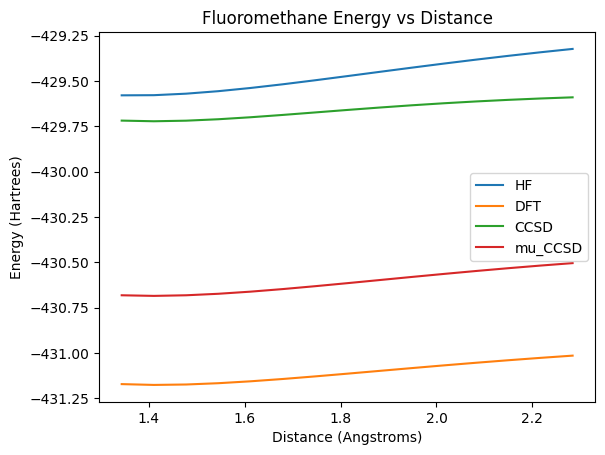

In [62]:
data = [
    'distances',
    'HF',
    'DFT',
    'CCSD', 
    'mu_CCSD', 
    # "mu_FCI",
    # 'huz_CCSD'
    ]
pfm.loc[pfm.index, data].plot(xlabel="Distance (Angstroms)", ylabel="Energy (Hartrees)", x="distances", title="Fluoromethane Energy vs Distance")


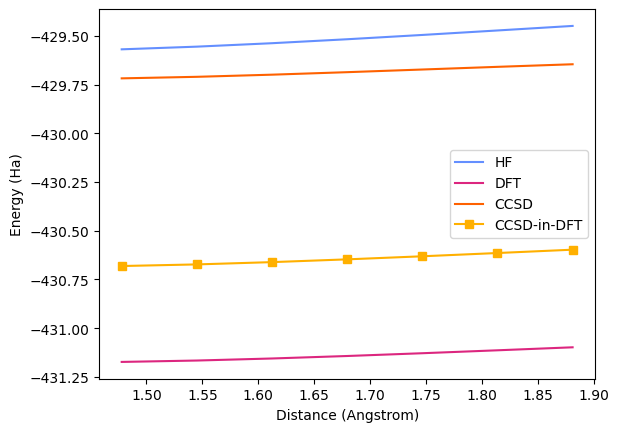

In [64]:
import matplotlib.pyplot as plt

toplot = pfm.loc[pfm.index[2:-6], data]
dist = toplot["distances"]

plt.plot(dist, toplot["HF"], label="HF", color="#648fff")
plt.plot(dist, toplot["DFT"], label="DFT", color="#dc267f")
plt.plot(dist, toplot["CCSD"], label="CCSD", color="#fe6100")
plt.plot(dist, toplot["mu_CCSD"], label="CCSD-in-DFT", color="#ffb000", marker="s")
# plt.plot(dist, toplot["mu_FCI"], label="FCI-in-DFT", color="#785ef0", marker="x")
# plt.title("Perfluoromethane Bond Dissociation")
plt.xlabel("Distance (Angstrom)")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.savefig("pfm.pdf")

## Graph differences in energy from FCI

PBE is obviously well suited to creating dissociation curves.

In [ ]:
f_diffs = pfm[['HF','DFT', 'mu_FCI']].subtract(pfm["CCSD"], axis=0)
f_diffs = pd.concat([f_diffs, pfm.filter(regex=("_CCSD")).subtract(pfm["CCSD"], axis=0)], axis=1)

In [ ]:
f_diffs["distances"] = pfm["distances"]
f_diffs[["distances","HF","DFT","mu_CCSD","mu_FCI"]].loc[:19].plot(x="distances", title="Fluoromethane Energy Difference vs Distance")

With frozen core (no frozen virtuals yet)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
f_diffs.filter(regex=("huz_FCI_1_")).loc[:19].plot(title="Fluoromethane Energy Difference vs Distance", ax=ax, linestyle='-')
f_diffs[["huz_FCI"]].loc[:19].plot(ax=ax)
# f_diffs.filter(regex=("huz_FCI_2_")).loc[:19].plot(title="Fluoromethane Energy Difference vs Distance", ax=ax, linestyle='--')


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
f_diffs.filter(regex=("huz_FCI_2_")).loc[:19].plot(title="Fluoromethane Energy Difference vs Distance", ax=ax, linestyle='-')
f_diffs[["huz_FCI"]].loc[:19].plot(ax=ax)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
f_diffs.filter(regex=("huz_FCI_3_")).loc[:19].plot(title="Fluoromethane Energy Difference vs Distance", ax=ax, linestyle='-')
f_diffs[["huz_FCI"]].loc[:19].plot(ax=ax)

## PFOA

In [ ]:
pfoa = pubchem_mol_geometry("Perfluorooctanoic acid")
pfoa_ordered = build_ordered_xyz_string(pfoa, active_atom_inds=[11,22])
save_ordered_xyz_file("pfoa", pfoa, active_atom_inds=[11,22])
pfoa_df = init_mol_df("pfoa", 11, 22)

In [ ]:
pfoa

## PFOA without $e_{aq}^-$

In [ ]:
calculate_energies(pfoa_df)